In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('/Cleaned_Students_Performance.csv')

# 1. Análise Exploratória de Dados

In [ ]:
plt.rcParams["figure.figsize"] = (10, 6)

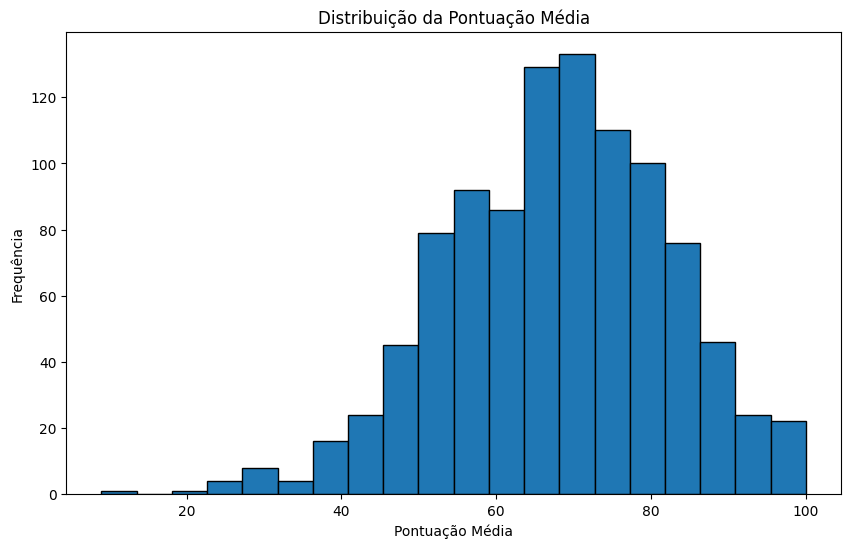

In [ ]:
# Distribuição das pontuações médias
plt.hist(data['average_score'], bins=20, edgecolor='k')
plt.title('Distribuição da Pontuação Média')
plt.xlabel('Pontuação Média')
plt.ylabel('Frequência')
plt.show()

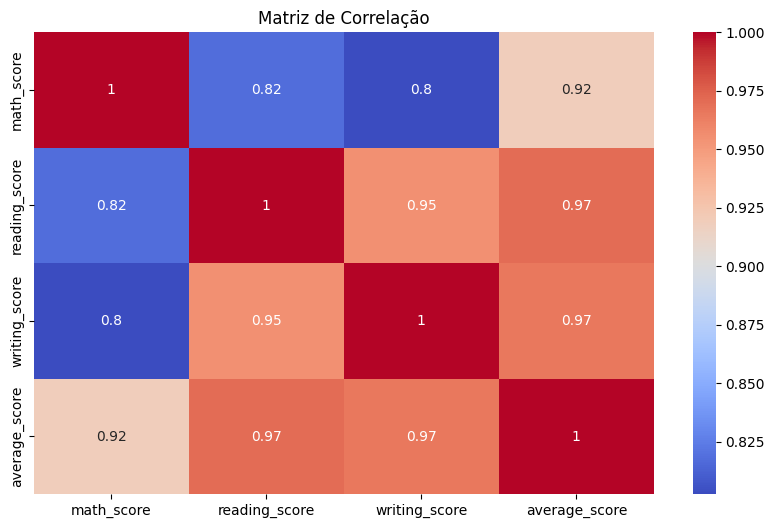

In [ ]:
# Matriz de correlação
corr_matrix = data[['math_score', 'reading_score', 'writing_score', 'average_score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

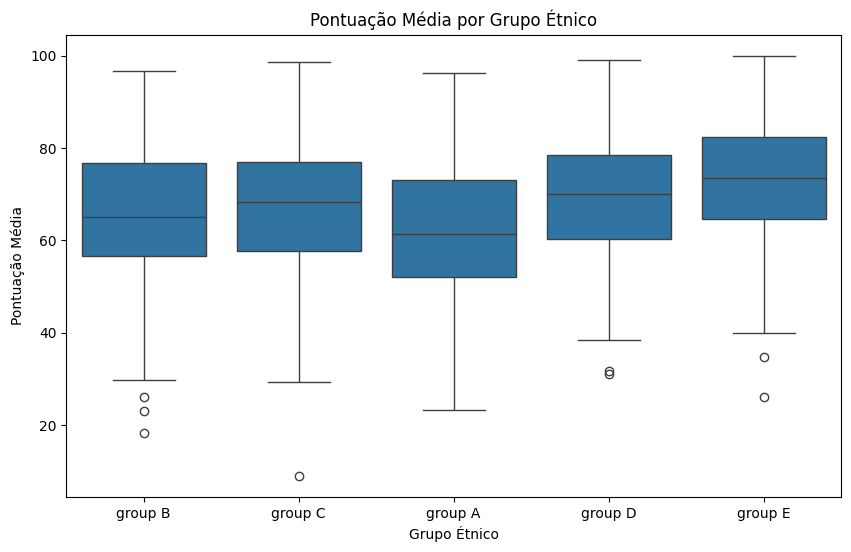

In [ ]:

# Boxplot das pontuações médias por grupo étnico
sns.boxplot(x='race_ethnicity', y='average_score', data=data)
plt.title('Pontuação Média por Grupo Étnico')
plt.xlabel('Grupo Étnico')
plt.ylabel('Pontuação Média')
plt.show()

# 2. Clusterização com K-Means


In [ ]:
# Seleção de features para clusterização
features = ['math_score', 'reading_score', 'writing_score']
X = data[features]

In [ ]:
# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Redução de dimensionalidade para visualização (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Aplicação do KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [ ]:
# Adicionando os clusters ao DataFrame
data['cluster'] = clusters

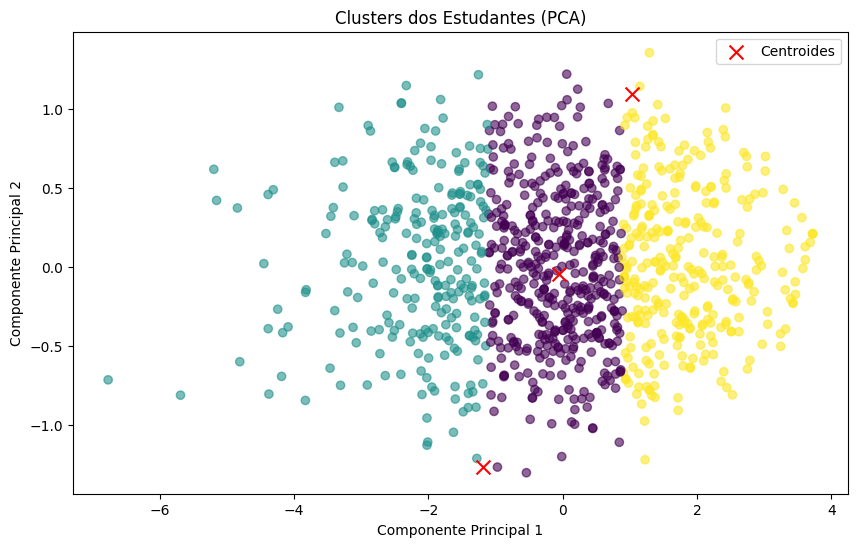

In [ ]:
# Visualização dos clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=100, label='Centroides')
plt.title('Clusters dos Estudantes (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

# 3. Modelo Supervisionado: Random Forest

In [ ]:
# Definindo o target para o modelo supervisionado
# Considerando "average_score" acima de 70 como 1 (alto desempenho) e abaixo ou igual como 0
data['performance'] = (data['average_score'] > 70).astype(int)

In [ ]:
# Features e target
X_supervised = data[['math_score', 'reading_score', 'writing_score', 'lunch', 'test_preparation_course']]
y_supervised = data['performance']

In [ ]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_supervised, y_supervised, test_size=0.3, random_state=42)

In [ ]:
# Modelo supervisionado: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Avaliação do modelo
y_pred = rf_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Relatório de Classificação:")
print(classification_rep)
print("Matriz de Confusão:")
print(conf_matrix)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       173
           1       0.98      0.99      0.99       127

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Matriz de Confusão:
[[171   2]
 [  1 126]]


# 4. Modelo Não Supervisionado: DBSCAN

In [ ]:
# Aplicação do DBSCAN para agrupamento
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [ ]:
# Adicionando os labels do DBSCAN ao DataFrame
data['dbscan_cluster'] = dbscan_labels

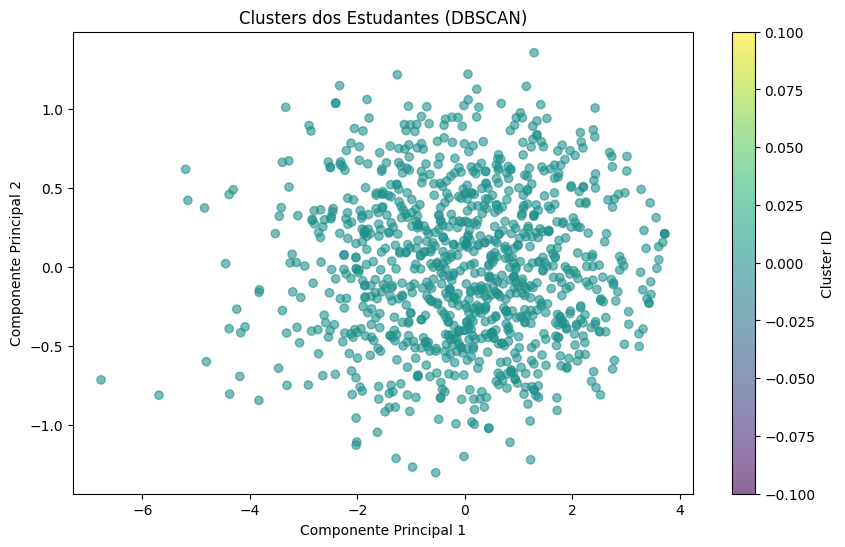

In [ ]:
# Visualização dos clusters do DBSCAN
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6)
plt.title('Clusters dos Estudantes (DBSCAN)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster ID')
plt.show()

In [ ]:
# Contagem de clusters gerados
print("Contagem de Clusters Gerados pelo DBSCAN:")
print(data['dbscan_cluster'].value_counts())

Contagem de Clusters Gerados pelo DBSCAN:
dbscan_cluster
0    1000
Name: count, dtype: int64


## **Dataset 1: Desempenho de Estudantes**

### **Contexto**
Este conjunto de dados contém informações sobre estudantes e seus desempenhos acadêmicos em três áreas: matemática, leitura e escrita. As variáveis incluem dados demográficos e socioeconômicos, como nível de educação dos pais e participação em cursos preparatórios.

### **Análise e Insights**

1. **Distribuição de Desempenho**:
   - A pontuação média dos estudantes está concentrada entre 70 e 80, sugerindo uma predominância de desempenhos medianos.
   - O desempenho em leitura e escrita apresenta forte correlação (acima de 0.8), indicando que habilidades em leitura estão intimamente ligadas à escrita.

2. **Impacto de Fatores Socioeconômicos**:
   - Grupos étnicos apresentaram variações significativas nas pontuações médias.
   - Estudantes que participaram de cursos preparatórios tiveram, em média, melhores desempenhos.

3. **Clusterização (KMeans e DBSCAN)**:
   - Três grupos principais de estudantes foram identificados com base nas notas, sendo que um cluster agrupou os melhores desempenhos.
   - DBSCAN foi menos eficaz ao identificar apenas um cluster principal, indicando baixa variabilidade estrutural nos dados.

4. **Modelo Supervisionado (Random Forest)**:
   - O modelo conseguiu prever desempenho com uma precisão de 99%, demonstrando que os dados contêm características altamente preditivas.

### **Conlusão**
Os dados revelam que fatores como participação em cursos e características demográficas influenciam diretamente o desempenho acadêmico. Este conhecimento pode guiar políticas educacionais, como a implementação de programas específicos para grupos sub-representados ou com baixo desempenho.

---

